<a href="https://colab.research.google.com/github/pourmand1376/Polyp_detection/blob/main/Kvasir_SEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://datasets.simula.no/kvasir-seg/Kvasir-SEG.zip

--2021-11-08 21:05:01--  https://datasets.simula.no/kvasir-seg/Kvasir-SEG.zip
Resolving datasets.simula.no (datasets.simula.no)... 128.39.36.14
Connecting to datasets.simula.no (datasets.simula.no)|128.39.36.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46227172 (44M) [application/zip]
Saving to: ‘Kvasir-SEG.zip’

Kvasir-SEG.zip      100%[===================>]  44.08M  16.4MB/s    in 2.7s    

2021-11-08 21:05:04 (16.4 MB/s) - ‘Kvasir-SEG.zip’ saved [46227172/46227172]



In [ ]:
!unzip Kvasir-SEG.zip

In [ ]:
 from pathlib import Path
 import json

In [ ]:
json_content=Path('/content/Kvasir-SEG/kavsir_bboxes.json').read_text()
json_dict = json.loads(json_content)

In [ ]:
images_path = Path('/content/Kvasir-SEG/images')
for pic in images_path.iterdir():
    print(pic)
    image_name = pic.name.replace('.jpg','')
    print(json_dict[image_name])

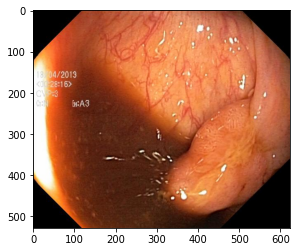

In [ ]:
import cv2
import matplotlib.pyplot as plt

sample_image = Path('/content/Kvasir-SEG/images/cju6z7e4bwgdd0987ogkzq9kt.jpg')
image=cv2.imread(str(sample_image))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

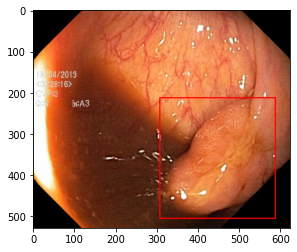

In [ ]:
image_prop = json_dict[sample_image.name.replace('.jpg','')]['bbox'][0]

height = image_prop['height']
width = image_prop['width']

image=cv2.rectangle(image, (image_prop['xmin'], image_prop['ymin']), (image_prop['xmax'], image_prop['ymax']), (255,0,0), 2)
plt.imshow(image)

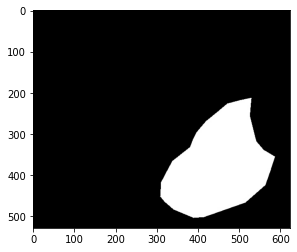

In [ ]:
mask_image = str(sample_image).replace('/images/','/masks/')
temp=cv2.imread(mask_image)
plt.imshow(temp)